# Analyse portée des comptes 
Objectif: faire un tableau récapitulatif des informations sur la portée des tweets et de leur source: s'agit-t-il des comptes climato-sceptiques ou pro-climats ? 

In [25]:
import pandas as pd 
import numpy as np

In [26]:
%cd /
%cd Users/Tanguy RUAULT/downloads/data_isc/hue

C:\
C:\Users\Tanguy RUAULT\downloads\data_isc\hue


## Fonctions

In [ ]:
def portee_com_treatment(dataframe,)

### import des infos de portée et des com 

In [27]:

portee_rt = pd.read_csv("portee_rt.csv", sep=";")
portee_rt = pd.DataFrame(portee_rt)
attrs = pd.read_csv("2main_communities100.csv")
com1 = attrs[attrs["COM2"]==0.0]
com1 = com1["Id"]
##ne contient que les noeuds appartenant à la com1
com2 = attrs[attrs["COM2"]==1.0]
com2 = com2["Id"]
print(com1)
print(com2)

0              292929271
1               18643437
2     817661098988019712
3             1392956425
4               78523300
             ...        
95    872428556550385664
96              89742111
97    960285302899298304
98            2327400218
99              25360591
Name: Id, Length: 100, dtype: int64
100    1006419421244678144
101                 939091
102              216776631
103              138203134
104              950477244
              ...         
195               20790580
196                1917731
197                5392522
198              424624761
199             2184934963
Name: Id, Length: 100, dtype: int64


In [28]:
portee_rt.head()

,RTid,numberOfAccountReached,target,sourceSnm,source,count_usr_retweets
0,1188635730043518976,103,2360941753,_ahsanR,1911811837,49
1,1259915164872093697,46,726716002520682496,KLovesNature,119605179,19
2,1123626300395216897,45,3408923489,HassCho,2396424968,12
3,1231534636725084160,33,3278362501,emel0371,1200042352947142656,24
4,1199016896995188736,26,860218071646130177,sha__re,2461150503,96


In [90]:
portee_com1= portee_rt[portee_rt["source"].isin(com1)]
portee_com2= portee_rt[portee_rt["source"].isin(com2)]

####on ne garde que les nbres de comptes atteints et le nom de la source : sachant que l'on groupe par des sources uniques 
portee_cs = portee_com1[["sourceSnm","source","numberOfAccountReached"]].sort_values(by=["numberOfAccountReached"], ascending= False)
portee_pc = portee_com2[["sourceSnm","source","numberOfAccountReached"]].sort_values(by=["numberOfAccountReached"], ascending= False)
print(portee_cs.shape)
print(portee_pc.shape)
####on remarque que com2 est plutôt liée aux pro_climat et com1 aux climatosceptiques

(81, 3)
(281, 3)


## Visualisation par tweets

In [96]:



portee_cs["n"] = np.arange(0,81,1)
portee_pc["n"] = np.arange(0,281,1)
portee_cs=  portee_cs.set_index("n").drop(["sourceSnm","source"], axis = 1)
portee_pc = portee_pc.set_index("n").drop(["sourceSnm","source"], axis = 1)

In [97]:
###changer le répertoire d'export
%cd /Users/Tanguy RUAULT/OneDrive/scolarite/master_hn/projet_de-recherche/memoire_m2/versions/figures

C:\Users\Tanguy RUAULT\OneDrive\scolarite\master_hn\projet_de-recherche\memoire_m2\versions\figures


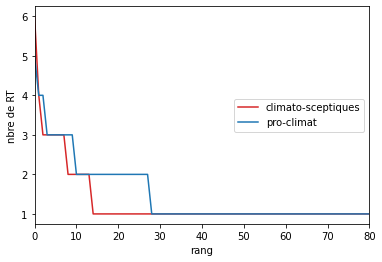

In [101]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(portee_cs, color = 'tab:red', label="climato-sceptiques")
ax.plot(portee_pc, color = 'tab:blue', label = "pro-climat")
ax.set_xlim(0,80)
ax.set_xlabel("rang")
ax.set_ylabel("nbre de RT")
ax.legend(loc='right')
plt.savefig("portee_rt_total.png")

In [102]:
portee_cs= portee_cs.groupby("source").sum()
portee_pc = portee_pc.groupby("source").sum()

print(portee_cs.shape)
print(portee_pc.shape)
###on anonymise les tweets en ajoutant des numéros
portee_cs["n"] = np.arange(0,30,1)
portee_pc["n"] = np.arange(0,58,1)
portee_cs=  portee_cs.set_index("n")
portee_pc = portee_pc.set_index("n")

####il n'y a pas de membre de la com2 dans le most reached

#portee_cs[["numberOfAccountReached"]].to_latex("portee_cs.tex")
#portee_pc[["numberOfAccountReached"]].to_latex("portee_pc.tex")

KeyError: 'source'

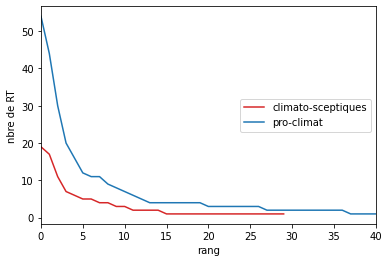

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(portee_cs, color = 'tab:red', label="climato-sceptiques")
ax.plot(portee_pc, color = 'tab:blue', label = "pro-climat")
ax.set_xlim(0,40)
ax.set_xlabel("rang")
ax.set_ylabel("nbre de RT")
ax.legend(loc='right')
#plt.savefig("portee_rt.png")

In [32]:
###import des infos de portée et des com 
portee_comments = pd.read_csv("portee_comments.csv", sep=";")
portee_comments = pd.DataFrame(portee_comments)
attrs = pd.read_csv("2main_communities100.csv")
com1 = attrs[attrs["COM2"]==0.0]
com1 = com1["Id"]
##ne contient que les noeuds appartenant à la com1
com2 = attrs[attrs["COM2"]==1.0]
com2 = com2["Id"]
print(com1)
print(com2)
#portee_comments.head()

0              292929271
1               18643437
2     817661098988019712
3             1392956425
4               78523300
             ...        
95    872428556550385664
96              89742111
97    960285302899298304
98            2327400218
99              25360591
Name: Id, Length: 100, dtype: int64
100    1006419421244678144
101                 939091
102              216776631
103              138203134
104              950477244
              ...         
195               20790580
196                1917731
197                5392522
198              424624761
199             2184934963
Name: Id, Length: 100, dtype: int64


In [71]:
portee_comments_cs= portee_comments[portee_comments["source"].isin(com1)]
portee_comments_pc= portee_comments[portee_comments["source"].isin(com2)]
print(portee_comments_pc.tail())

                   quoted               id_str  numberOfAccountCommenting  \
3849  1202601324338188289  1323723354340265986                          1   
3904  1293619774254198784  1294114085399928832                          1   
4082  1293472292362694656  1294940677713928192                          1   
4117  1209025851343413248  1211250490249490432                          1   
4338  1242679443577020416  1246787185954652167                          1   

           quotedSnm        source  
3849       Onalytica  9.044090e+08  
3904  SamanthaJPower  1.880725e+09  
4082         Reuters  1.006419e+18  
4117     CarbonBrief  1.006419e+18  
4338  Fridays4future  1.006419e+18  


In [68]:
####on ne garde que les nbres de comptes atteints et le nom de la source
portee_comments_cs= portee_comments_cs[["quotedSnm","source","numberOfAccountCommenting"]].groupby("source").sum().sort_values(by=["numberOfAccountCommenting"], ascending= False)



portee_comments_pc = portee_comments_pc[["quotedSnm","source","numberOfAccountCommenting"]].groupby("source").sum().sort_values(by=["numberOfAccountCommenting"], ascending= False)
portee_comments_pc.shape

(18, 1)

### Visualisation

In [35]:
#print(portee_com1.head())
#print(portee_com2.head())

###on anonymise les tweets en ajoutant des numéros
portee_comments_cs["n"] = np.arange(0,12,1)
portee_comments_pc["n"] = np.arange(0,18,1)
portee_comments_cs=  portee_comments_cs.set_index("n")
portee_comments_pc= portee_comments_pc.set_index("n")

####il n'y a pas de membre de la com2 dans le most reached

portee_comments_cs[["numberOfAccountCommenting"]].to_latex("portee_comments_cs.tex")
portee_comments_pc[["numberOfAccountCommenting"]].to_latex("portee_comments_pc.tex")

In [47]:
###changer le répertoire d'export
%cd /Users/Tanguy RUAULT/OneDrive/scolarite/master_hn/projet_de-recherche/memoire_m2/versions/figures

C:\Users\Tanguy RUAULT\OneDrive\scolarite\master_hn\projet_de-recherche\memoire_m2\versions\figures


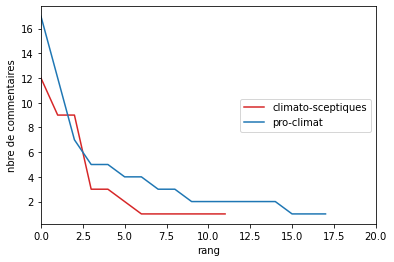

In [64]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(portee_comments_cs, color = 'tab:red', label="climato-sceptiques")
ax.plot(portee_comments_pc, color = 'tab:blue', label = "pro-climat")
ax.set_xlim(0,20)
ax.set_xlabel("rang")
ax.set_ylabel("nbre de commentaires")
ax.legend(loc='right')
plt.savefig("portee_comments.png")

### regarder plus précisément les comptes les plus retweetés 

In [1]:
%cd /
%cd Users/Tanguy RUAULT/downloads/data_isc/hue

C:\
C:\Users\Tanguy RUAULT\downloads\data_isc\hue


## importation du graphe ego autoru de joebiden

In [47]:


####regarder quelle communauté interagit le plus avec lui

import networkx as nx
import pandas as pd
raw_g = pd.read_csv("graph_joebiden.csv", delimiter = ";")
raw_g = pd.DataFrame(raw_g)
raw_g.sort_values(by=["weight"], ascending= False)
raw_g_reduced = raw_g.head(10) ####on fait un test avec les 100 premièrs lignes 



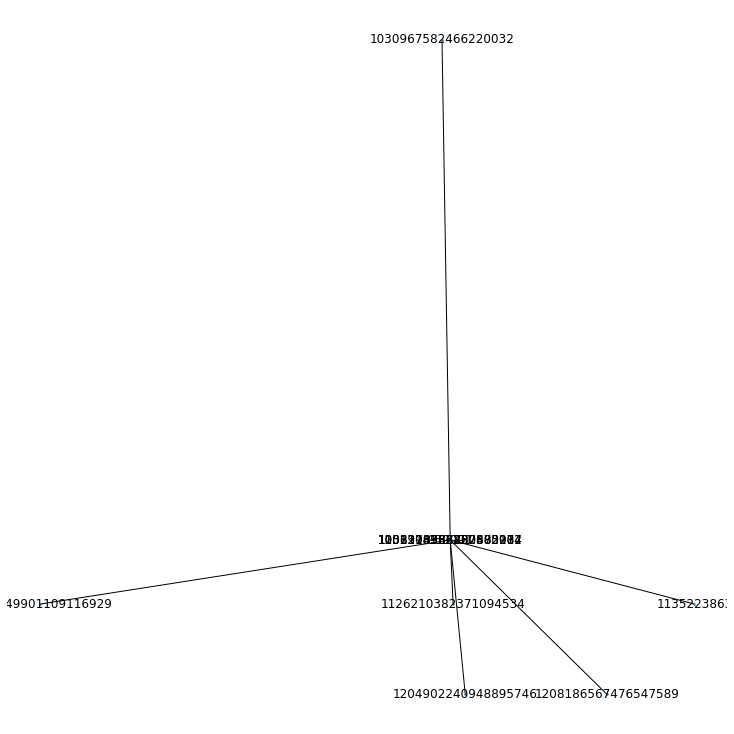

In [48]:
mc_g = nx.from_pandas_edgelist(raw_g_reduced, source = 'source', target = 'target',edge_attr='weight')



import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
#nx.draw_kamada_kawai(mc_g,node_size = 1)
nx.draw_spectral(mc_g, node_size = 2, with_labels=True)
#nx.draw(mc_g,node_size = 2)
plt.show()
